In [1]:
# Import necessary libraries
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
def plot_etfs_comparison(tickers, start_date, end_date):
    """
    Plot the adjusted closing prices of multiple ETFs over a given period.

    Parameters:
    tickers (list): List of ETF tickers (e.g., ['QQQ', 'SQQQ']).
    start_date (str): Start date in 'YYYY-MM-DD' format.
    end_date (str): End date in 'YYYY-MM-DD' format.
    """
    # Download historical data for the tickers
    data = yf.download(tickers, start=start_date, end=end_date, progress=False)

    # Ensure 'Adj Close' or 'Close' column exists
    if "Adj Close" in data.columns:
        data = data["Adj Close"]
    elif "Close" in data.columns:
        data = data["Close"]
    else:
        raise KeyError("Neither 'Adj Close' nor 'Close' columns found in the data.")

    # Normalize prices to start at 100 for better comparison
    normalized_data = (data / data.iloc[0]) * 100

    # Plot the normalized data
    plt.figure(figsize=(12, 6))
    for ticker in tickers:
        plt.plot(normalized_data[ticker], label=ticker)

    # Add title, labels, legend, and grid
    plt.title("QQQ vs. SQQQ Performance Comparison (Covid)", fontsize=16)
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Normalized Price (Base = 100)", fontsize=14)
    plt.legend(tickers, fontsize=12)
    plt.grid(alpha=0.3)
    plt.show()


In [3]:
# Set the tickers and time range
tickers = ["QQQ", "SQQQ"]
start_date = "2020-01-01"
end_date = "2020-12-31"

In [4]:
# Download and inspect the data structure
data = yf.download(tickers, start=start_date, end=end_date, progress=False)
print(data.head())
print("Columns available:", data.columns)

Price            Close                     High                      Low  \
Ticker             QQQ         SQQQ         QQQ         SQQQ         QQQ   
Date                                                                       
2020-01-02  209.638031  2396.864014  209.638031  2472.258328  207.523798   
2020-01-03  207.717789  2461.005615  208.968875  2491.388401  206.844949   
2020-01-06  209.056137  2413.743164  209.085231  2528.522559  205.836316   
2020-01-07  209.027023  2414.868408  209.618619  2438.499460  208.367547   
2020-01-08  210.598190  2360.854980  211.558326  2428.372282  208.668242   

Price                          Open                 Volume          
Ticker             SQQQ         QQQ         SQQQ       QQQ    SQQQ  
Date                                                                
2020-01-02  2396.864014  207.931124  2457.629580  30969400  128994  
2020-01-03  2418.244658  206.864350  2490.263112  27518900  145693  
2020-01-06  2413.743164  206.088466  2519.5202

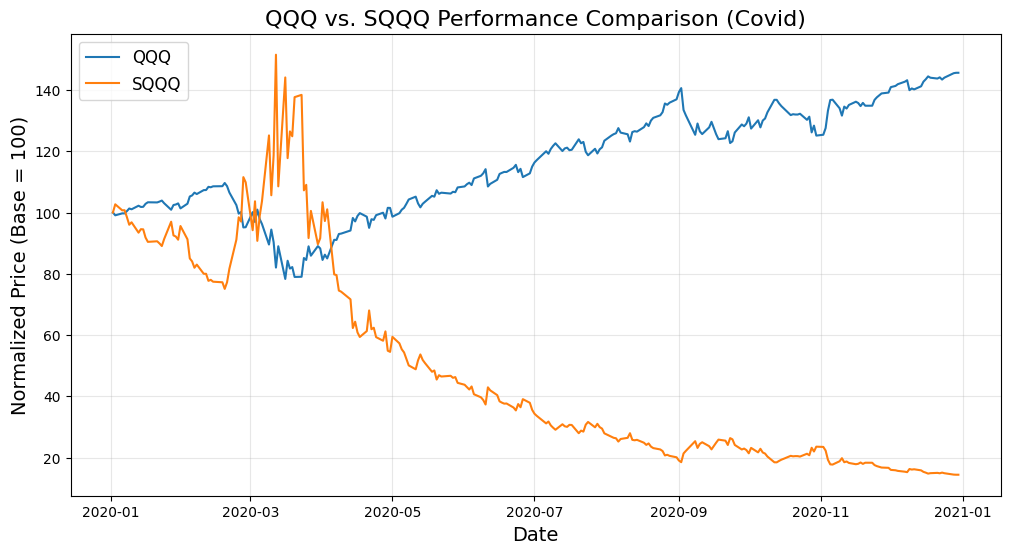

In [5]:
# Call the function to plot the comparison
plot_etfs_comparison(tickers, start_date, end_date)